# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}"

cit = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

print("Begining data retrieval")
print("-----------------------")

for city in cities:
    try:
        response = requests.get(f"{query_url}&q={city}&units=imperial").json()
        cit.append(response['name'])
        print(f"Processing {len(cit)} of {len(cities)}: {city}")
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except:
        print("Error, skipping")
print(f"Processed {len(cit)}")

Begining data retrieval
-----------------------
Error, skipping
Processing 1 of 602: ushuaia
Processing 2 of 602: urus-martan
Processing 3 of 602: hobart
Processing 4 of 602: inhambane
Processing 5 of 602: barrow
Processing 6 of 602: arraial do cabo
Processing 7 of 602: bethel
Error, skipping
Processing 8 of 602: margate
Processing 9 of 602: port elizabeth
Processing 10 of 602: rikitea
Processing 11 of 602: butaritari
Error, skipping
Processing 12 of 602: pasni
Processing 13 of 602: castro
Processing 14 of 602: busselton
Processing 15 of 602: saint-philippe
Processing 16 of 602: mataura
Processing 17 of 602: victoria
Processing 18 of 602: sao francisco do sul
Processing 19 of 602: keflavik
Processing 20 of 602: calvinia
Error, skipping
Error, skipping
Processing 21 of 602: albany
Processing 22 of 602: vaini
Processing 23 of 602: cherskiy
Processing 24 of 602: arlit
Processing 25 of 602: cape town
Processing 26 of 602: carutapera
Error, skipping
Processing 27 of 602: alta floresta
Proce

Processing 242 of 602: salimpur
Error, skipping
Processing 243 of 602: bambous virieux
Error, skipping
Error, skipping
Processing 244 of 602: sayyan
Error, skipping
Processing 245 of 602: esmeraldas
Error, skipping
Processing 246 of 602: saint-georges
Processing 247 of 602: miles city
Processing 248 of 602: fez
Processing 249 of 602: harwich
Processing 250 of 602: kotelnich
Processing 251 of 602: vila franca do campo
Processing 252 of 602: atambua
Processing 253 of 602: rawson
Processing 254 of 602: puri
Processing 255 of 602: molina
Processing 256 of 602: puertollano
Processing 257 of 602: sorland
Processing 258 of 602: baruun-urt
Processing 259 of 602: saskylakh
Processing 260 of 602: caravelas
Processing 261 of 602: todos santos
Error, skipping
Processing 262 of 602: naze
Processing 263 of 602: sao mateus do sul
Processing 264 of 602: remanso
Processing 265 of 602: qaanaaq
Processing 266 of 602: padang
Error, skipping
Processing 267 of 602: bandar
Processing 268 of 602: katete
Proce

Error, skipping
Error, skipping
Processing 478 of 602: oktyabrskiy
Processing 479 of 602: arawa
Processing 480 of 602: paamiut
Processing 481 of 602: poya
Processing 482 of 602: behshahr
Processing 483 of 602: dhidhdhoo
Processing 484 of 602: lata
Processing 485 of 602: havelock
Processing 486 of 602: batticaloa
Processing 487 of 602: nurota
Processing 488 of 602: idanre
Processing 489 of 602: kahului
Error, skipping
Processing 490 of 602: laramie
Processing 491 of 602: zabol
Processing 492 of 602: thaton
Processing 493 of 602: fayaoue
Processing 494 of 602: mackay
Processing 495 of 602: roros
Processing 496 of 602: chisec
Processing 497 of 602: siddipet
Processing 498 of 602: nalut
Error, skipping
Processing 499 of 602: haukipudas
Processing 500 of 602: nanning
Error, skipping
Processing 501 of 602: panzhihua
Processing 502 of 602: port blair
Processing 503 of 602: mago
Processing 504 of 602: adrar
Processing 505 of 602: sierra vista
Processing 506 of 602: preston
Processing 507 of 60

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City" : cit,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitude" : lat,
    "Longitude" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("Output/weather.csv")
weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ushuaia,40,AR,1571705997,40,-54.81,-68.31,51.80,12.75
1,Urus-Martan,3,RU,1571705998,100,43.13,45.54,46.40,1.25
2,Hobart,40,AU,1571705998,47,-42.88,147.33,66.00,4.70
3,Inhambane,16,MZ,1571705998,89,-23.87,35.38,75.13,9.78
4,Barrow,17,AR,1571705998,66,-38.31,-60.23,48.11,5.57
...,...,...,...,...,...,...,...,...,...
527,Piacabucu,1,BR,1571706204,83,-10.41,-36.43,76.50,13.00
528,Acoyapa,100,NI,1571706204,93,11.97,-85.17,72.61,4.03
529,Petrolia,90,CA,1571706205,82,42.88,-82.15,60.01,9.17
530,Bilibino,2,RU,1571706205,90,68.06,166.44,0.72,1.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

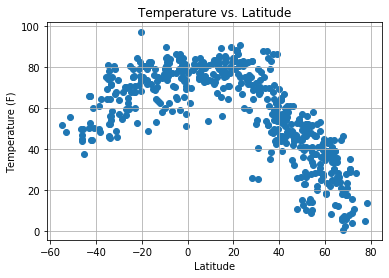

In [6]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o")
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(b=True)
plt.savefig("Output/lat_vs_temp.png")

#### Latitude vs. Humidity Plot

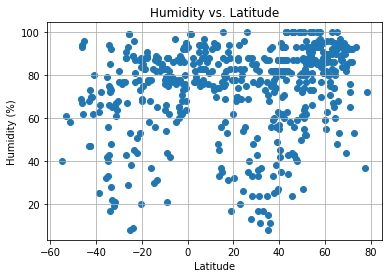

In [7]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True)
plt.savefig("Output/lat_vs_humid.png")

#### Latitude vs. Cloudiness Plot

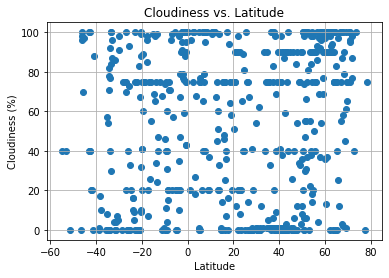

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True)
plt.savefig("Output/lat_vs_cloudy.png")

#### Latitude vs. Wind Speed Plot

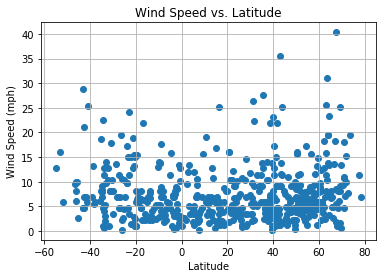

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True)
plt.savefig("Output/lat_vs_windmph.png")